In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:\\Users\\dhubb\\OneDrive\\Desktop\\user\\indian_cities_rainfall_7day_regression.csv", parse_dates=["date"])

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  1790 non-null   object 
 1   city                  1790 non-null   object 
 2   rainfall_mm           1790 non-null   float64
 3   temp_C                1790 non-null   float64
 4   humidity_pct          1790 non-null   float64
 5   wind_kmph             1790 non-null   float64
 6   target_rainfall_day1  1790 non-null   float64
 7   target_rainfall_day2  1790 non-null   float64
 8   target_rainfall_day3  1790 non-null   float64
 9   target_rainfall_day4  1790 non-null   float64
 10  target_rainfall_day5  1790 non-null   float64
 11  target_rainfall_day6  1790 non-null   float64
 12  target_rainfall_day7  1790 non-null   float64
dtypes: float64(11), object(2)
memory usage: 181.9+ KB
None


In [11]:
df.head()

,date,city,rainfall_mm,temp_C,humidity_pct,wind_kmph,target_rainfall_day1,target_rainfall_day2,target_rainfall_day3,target_rainfall_day4,target_rainfall_day5,target_rainfall_day6,target_rainfall_day7
0,2023-01-01,Bengaluru,8.583445,24.017210,55.064902,3.628157,12.209970,0.000000,11.123322,0.000000,17.434058,0.000000,0.000000
1,2023-01-02,Bengaluru,12.209970,27.274069,99.272701,7.016935,0.000000,11.123322,0.000000,17.434058,0.000000,0.000000,8.603687
2,2023-01-03,Bengaluru,0.000000,27.173035,72.431347,8.589390,11.123322,0.000000,17.434058,0.000000,0.000000,8.603687,0.000000
3,2023-01-04,Bengaluru,11.123322,25.107058,56.184083,4.605356,0.000000,17.434058,0.000000,0.000000,8.603687,0.000000,0.000000
4,2023-01-05,Bengaluru,0.000000,27.409655,66.990197,8.105689,17.434058,0.000000,0.000000,8.603687,0.000000,0.000000,0.000000


In [10]:
df = df.drop_duplicates()

In [12]:
df["rainfall_mm"] = df["rainfall_mm"].apply(lambda x: max(0, x))

In [13]:
print("Missing values before cleaning:")
print(df.isna().sum())

Missing values before cleaning:
date                    0
city                    0
rainfall_mm             0
temp_C                  0
humidity_pct            0
wind_kmph               0
target_rainfall_day1    0
target_rainfall_day2    0
target_rainfall_day3    0
target_rainfall_day4    0
target_rainfall_day5    0
target_rainfall_day6    0
target_rainfall_day7    0
dtype: int64


In [9]:
print(df.groupby("city")["rainfall_mm"].describe())

           count      mean       std  min  25%       50%        75%        max
city                                                                          
Bengaluru  358.0  7.468542  7.823706  0.0  0.0  5.311179  13.275804  32.107943
Chennai    358.0  7.415763  7.691868  0.0  0.0  5.723587  12.783006  37.430930
Delhi      358.0  6.904089  7.241175  0.0  0.0  5.470467  11.252805  30.269324
Kolkata    358.0  7.349251  7.547905  0.0  0.0  5.775750  12.017536  35.982994
Mumbai     358.0  6.755397  6.974032  0.0  0.0  5.182524  11.209675  29.267165


In [14]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
df["city_code"] = le.fit_transform(df["city"])


In [16]:
num_cols = ["rainfall_mm", "temp_C", "humidity_pct", "wind_kmph", "city_code"]

In [17]:
imputer = KNNImputer(n_neighbors=5)   
df[num_cols] = imputer.fit_transform(df[num_cols])

In [18]:
df["city"] = le.inverse_transform(df["city_code"].astype(int))
df = df.drop(columns=["city_code"])

In [19]:
print("Missing values after cleaning:")
print(df.isna().sum())

Missing values after cleaning:
date                    0
city                    0
rainfall_mm             0
temp_C                  0
humidity_pct            0
wind_kmph               0
target_rainfall_day1    0
target_rainfall_day2    0
target_rainfall_day3    0
target_rainfall_day4    0
target_rainfall_day5    0
target_rainfall_day6    0
target_rainfall_day7    0
dtype: int64


In [20]:
df.to_csv("indian_cities_rainfall_cleaned.csv", index=False)
print("Cleaned dataset saved as indian_cities_rainfall_cleaned.csv")

Cleaned dataset saved as indian_cities_rainfall_cleaned.csv


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import joblib

In [22]:
df = pd.read_csv("indian_cities_rainfall_cleaned.csv", parse_dates=["date"])

In [23]:
X = df[["rainfall_mm", "temp_C", "humidity_pct", "wind_kmph", "city"]]
y = df[[f"target_rainfall_day{i}" for i in range(1, 8)]]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)

In [25]:
numeric_features = ["rainfall_mm", "temp_C", "humidity_pct", "wind_kmph"]
categorical_features = ["city"]

In [30]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['rainfall_mm', 'temp_C',
                                                   'humidity_pct',
                                                   'wind_kmph']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['city'])])),
                ('regressor',
                 MultiOutputRegressor(estimator=RandomForestRegressor(n_estimators=200,
                                                                      n_jobs=-1,
                                                                      random_state=42)))])

In [29]:
y_pred = model.predict(X_test)

In [31]:
for i in range(7):
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Day {i+1}: MAE={mae:.2f}, RMSE={rmse:.2f}")

Day 1: MAE=5.91, RMSE=7.20
Day 2: MAE=5.82, RMSE=7.18
Day 3: MAE=5.93, RMSE=7.25
Day 4: MAE=6.02, RMSE=7.28
Day 5: MAE=5.96, RMSE=7.22
Day 6: MAE=6.04, RMSE=7.27
Day 7: MAE=5.90, RMSE=7.22


In [32]:
joblib.dump(model, "rainfall_regression_model.joblib")
print("Model saved as rainfall_regression_model.joblib")

Model saved as rainfall_regression_model.joblib


In [34]:
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year

C:\Users\dhubb\AppData\Local\Temp\ipykernel_29704\2763507443.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="month", y="rainfall_mm", hue="city", data=df, ci=None)


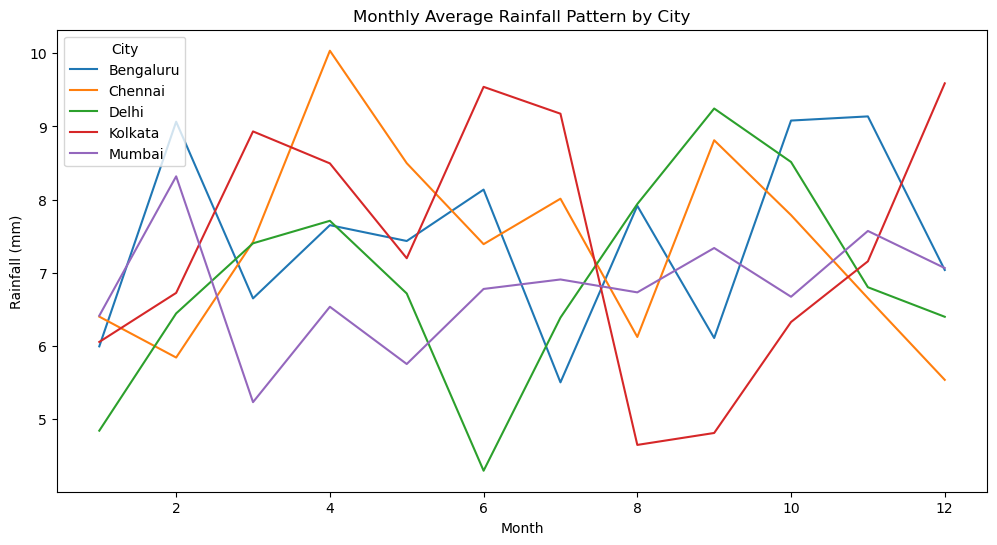

In [35]:
plt.figure(figsize=(12,6))
sns.lineplot(x="month", y="rainfall_mm", hue="city", data=df, ci=None)
plt.title("Monthly Average Rainfall Pattern by City")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.legend(title="City")
plt.show()

In [36]:
yearly_trend = df.groupby(["year","city"])["rainfall_mm"].mean().reset_index()


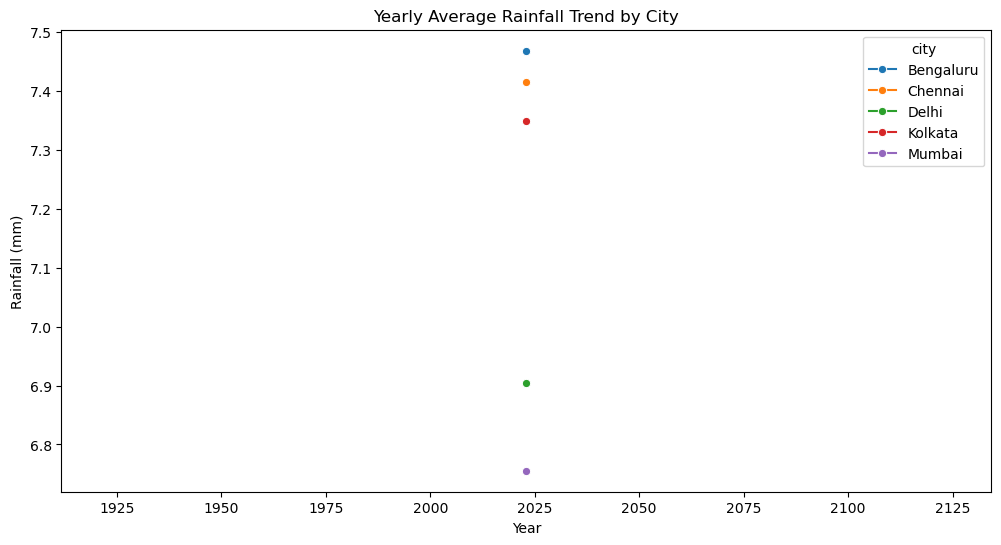

In [37]:
plt.figure(figsize=(12,6))
sns.lineplot(x="year", y="rainfall_mm", hue="city", data=yearly_trend, marker="o")
plt.title("Yearly Average Rainfall Trend by City")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.show()

In [49]:
df["date"] = pd.to_datetime(df["date"])


In [46]:
df["rainfall_mm"] = pd.to_numeric(df["rainfall_mm"], errors="coerce")


In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [48]:
mumbai = (
    df[df["city"]=="Mumbai"]
    .set_index("date")
    .resample("M")
    .mean(numeric_only=True)
)

C:\Users\dhubb\AppData\Local\Temp\ipykernel_29704\3127944606.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


In [50]:
decomposition = seasonal_decompose(mumbai["rainfall_mm"], model="additive", period=12)
fig = decomposition.plot()
fig.set_size_inches(12,8)
plt.suptitle("Seasonal Decomposition of Rainfall (Mumbai)", fontsize=14)
plt.show()

ValueError: x must have 2 complete cycles requires 24 observations. x only has 12 observation(s)

In [51]:
mumbai = (
    df[df["city"]=="Mumbai"]
    .set_index("date")
    .resample("M")
    .mean(numeric_only=True)
)

print(mumbai.shape)   # check how many months of data


(12, 13)


C:\Users\dhubb\AppData\Local\Temp\ipykernel_29704\4075236278.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


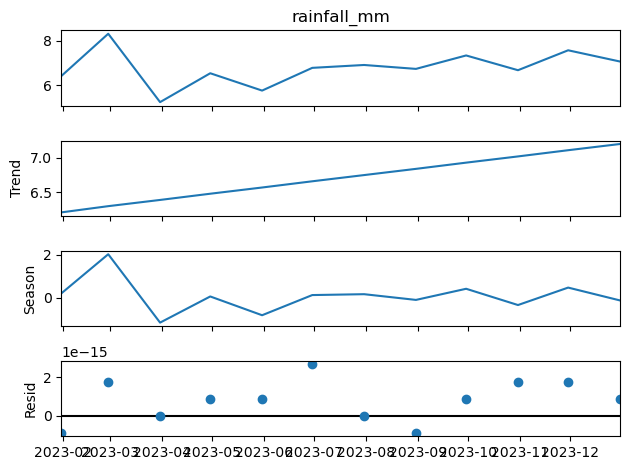

In [54]:
from statsmodels.tsa.seasonal import STL

stl = STL(mumbai["rainfall_mm"], period=12)
result = stl.fit()
fig = result.plot()
plt.show()

In [55]:
pivot = df.pivot_table(index=df["date"].dt.year, columns=df["date"].dt.month, values="rainfall_mm", aggfunc="mean")

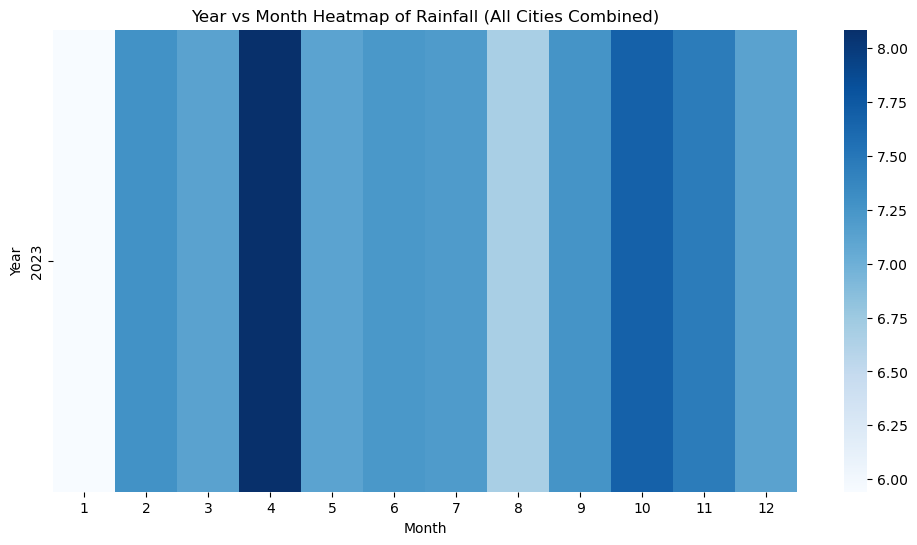

In [56]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="Blues", annot=False)
plt.title("Year vs Month Heatmap of Rainfall (All Cities Combined)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

In [57]:
model = joblib.load("rainfall_regression_model.joblib")

In [58]:
selected_city = "Mumbai" 
latest_data = df[df["city"] == selected_city].sort_values("date").iloc[-1]


In [59]:
X_new = pd.DataFrame([{
    "rainfall_mm": latest_data["rainfall_mm"],
    "temp_C": latest_data["temp_C"],
    "humidity_pct": latest_data["humidity_pct"],
    "wind_kmph": latest_data["wind_kmph"],
    "city": latest_data["city"]
}])

In [60]:
y_pred = model.predict(X_new)

In [61]:
forecast = pd.DataFrame({
    "Day": [f"Day {i+1}" for i in range(7)],
    "Predicted_Rainfall_mm": y_pred[0]
})


In [62]:
print(f"\n Rainfall Forecast for {selected_city} (Next 7 Days):\n")
print(forecast)


 Rainfall Forecast for Mumbai (Next 7 Days):

     Day  Predicted_Rainfall_mm
0  Day 1               7.137360
1  Day 2               8.105000
2  Day 3               8.365964
3  Day 4              15.007846
4  Day 5               6.452209
5  Day 6              14.032264
6  Day 7               7.098907


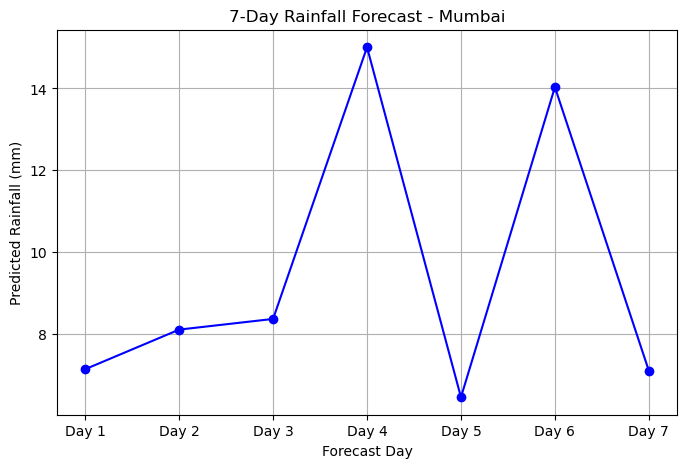

In [63]:
plt.figure(figsize=(8,5))
plt.plot(forecast["Day"], forecast["Predicted_Rainfall_mm"], marker="o", linestyle="-", color="blue")
plt.title(f"7-Day Rainfall Forecast - {selected_city}")
plt.xlabel("Forecast Day")
plt.ylabel("Predicted Rainfall (mm)")
plt.grid(True)
plt.show()